In [119]:
import pandas as pd
import numpy as np
import os
import glob
from tqdm import tqdm
import pickle 
import random
import torch
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
from torchvision.transforms import ToTensor
from sklearn.preprocessing import Normalizer
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import matplotlib.pyplot as plt

In [120]:
resnet = InceptionResnetV1(pretrained='casia-webface', device=device).eval()

In [121]:
data = np.load('100_Bollywood_celebrity_faces_dataset.npz')
dataX, datay = data['arr_0'], data['arr_1']
print('Loaded: ', dataX.shape, dataX.shape)

Loaded:  (11803, 160, 160, 3) (11803,)


In [122]:
from torchvision.transforms import ToTensor
tf_img = lambda i: ToTensor()(i).unsqueeze(0).float()
embeddings = lambda input: resnet(input)

In [125]:
emdX = list()
for face in dataX:

    face=face/255
    t = tf_img(face).to(device)
    emd = embeddings(t).squeeze().cpu().tolist()
    emdX.append(emd)
    
emdX = np.asarray(emdX)
print(emdX.shape)

(11803, 512)


In [330]:
test_points_index = [random.randint(0, len(emdX)) for _ in range(15)]

test_points = emdX[test_points_index]

train_point_index = [i for i in range(len(emdX)) if i not in test_points_index]

train_points = emdX[train_point_index]

In [331]:
knn = NearestNeighbors(n_neighbors=2)
knn.fit(train_points)

NearestNeighbors(n_neighbors=2)

In [332]:
# Find the most similar 2 points for the test point
distances, indices = knn.kneighbors(test_points)

In [333]:
print(set(datay))

{'Arjun_Rampal', 'Bhumi_Pednekar', 'Emraan_Hashmi', 'Aftab_Shivdasani', 'Akshay_Kumar', 'Juhi_Chawla', 'Priyanka_Chopra', 'Mrunal_Thakur', 'Randeep_Hooda', 'Sunny_Deol', 'Amitabh_Bachchan', 'Shilpa_Shetty', 'Karisma_Kapoor', 'Vaani_Kapoor', 'Sonakshi_Sinha', 'Kareena_Kapoor', 'Kartik_Aaryan', 'Nana_Patekar', 'Bobby_Deol', 'Kriti_Kharbanda', 'Anushka_Shetty', 'Kriti_Sanon', 'Vivek_Oberoi', 'Ranveer_Singh', 'Kangana_Ranaut', 'Ranbir_Kapoor', 'Kunal_Khemu', 'Kiara_Advani', 'Bipasha_Basu', 'Nushrat_Bharucha', 'Vicky_Kaushal', 'Aamir_Khan', 'Jacqueline_Fernandez', 'Sushant_Singh_Rajput', 'Saif_Ali_Khan', 'Prachi_Desai', 'Paresh_Rawal', 'Riteish_Deshmukh', 'Kajal_Aggarwal', 'Farhan_Akhtar', 'Madhuri_Dixit', 'Arshad_Warsi', 'Rani_Mukerji', 'Salman_Khan', 'Arjun_Kapoor', 'Akshaye_Khanna', 'Rajkummar_Rao', 'Pooja_Hegde', 'Katrina_Kaif', 'R_Madhavan', 'Taapsee_Pannu', 'Kajol', 'Hrithik_Roshan', 'Tamannaah_Bhatia', 'Huma_Qureshi', 'Nargis_Fakhri', 'John_Abraham', 'Richa_Chadda', 'Zareen_Khan', 'D

In [334]:
len(set(datay))

100

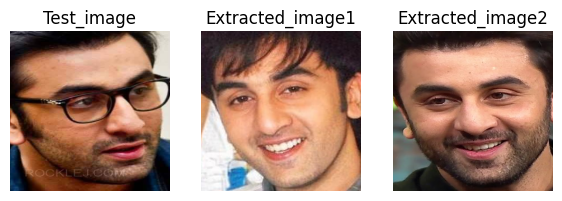

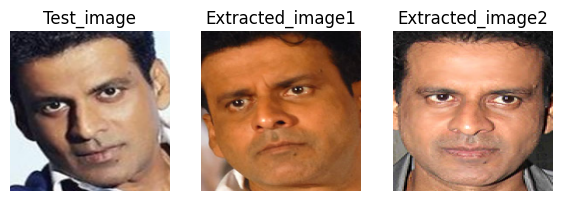

In [335]:
for i in range(2):
    random_index, random_element = random.choice(list(enumerate(test_points_index)))
    img1=dataX[random_element]
    img2=dataX[indices[random_index][0]]
    img3=dataX[indices[random_index][1]]
    fig, axes = plt.subplots(1, 3, figsize=(7, 3))
    axes[0].imshow(img1)
    axes[0].set_title('Test_image')
    axes[0].axis("off")
    axes[1].imshow(img2)
    axes[1].set_title('Extracted_image1')
    axes[1].axis("off")
    axes[2].imshow(img3)
    axes[2].set_title('Extracted_image2')
    axes[2].axis("off")
    fig.savefig("Extraction_result2.png")
    
    